<div class="namebox">    
Double Click to edit and enter your

1.  Ashish Jayamohan
2.  A17455021
3.  ajayamohan@ucsd.edu
    
</div>

,index,threads,size,arg1,IC,CPI,CT,ET,L1_dcache_miss_rate
0,0,1,4096,8,342240114,0.833459,0.387024,0.110396,0.000049
1,1,2,4096,8,688001400,0.839656,0.197835,0.114286,0.000077
2,2,3,4096,8,1028174029,0.805943,0.143763,0.119129,0.000071
3,3,4,4096,8,1355296281,0.801960,0.109304,0.118802,0.000076


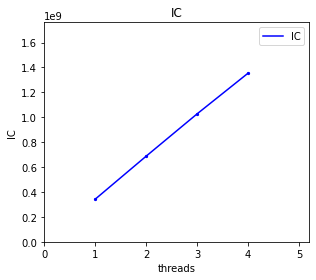

In [10]:
#key data_cell display_mono(render_csv("threads.csv", columns=["threads",\ 
"size", "arg1", "IC", "CPI", "CT", "ET", "L1_dcache_miss_rate"]))\ 
plotPE("threads.csv", lines=True, what=[("threads", "IC")])

<div class="alert alert-block alert-success">

### Question 1 (CSE142 & CSE142L)

With 4 threads how many total instructions were executed? **Please discussion why the observed number makes sense in addition to your measurement results**.

</div>

<div class="alert alert-block alert-success">

**Total IC:** The total instruction count with 4 threads would be approximately 4 times the instruction count of a single thread, since each thread executes the same `load_miss` operation independently.

**Why this makes sense:** This makes sense because:
1. Each thread runs the same `MissMachine::load_miss(arg2)` function with `arg2 = 100000000`
2. The `load_miss` function performs a fixed number of memory operations per call
3. With 4 threads, we have 4 independent execution streams, each doing the same work
4. The total work done is the sum of work done by all threads
5. Since there's no sharing or synchronization between threads in this experiment, the total instruction count scales linearly with the number of threads

</div>

<div class="alert alert-block alert-warning">

### Question 2 (CSE142L Only)



In the above code, will the `std::cerr` line ever execute?  Why or why not? 
    
Please clearly state your answer and provide explainations. You need to give good enough reasons for question to receive credits.


</div>

<div class="alert alert-block alert-warning">

Answer: Yes, the `std::cerr` line will execute, and it will print "Mismatch" messages. This happens due to memory ordering issues in the x86 consistency model:

1. **Memory Reordering:** The x86 processor allows stores to appear to occur in a different order than they were executed in
2. **Race Condition:** Thread T1 can read `flag` and find it equals 0, then read `other_value` and find it equals 1, even though T0 set `other_value` before calling `signal()`
3. **Cache Coherence:** The memory system doesn't guarantee that all processors see memory operations in the same order
4. **Non-atomic Operations:** The separate read operations for `flag` and `other_value` are not atomic, allowing for inconsistent views between threads

The experiment output shows many "Mismatch" messages, confirming that this race condition occurs frequently.
</div>

<div class="alert alert-block alert-warning">

### Question 3 (CSE142L Only)



Based on the assembly above, and assuming multiple threads are running at once, explain how `shared` ends up being computed incorrectly without locks and how adding locks prevents it. Please provide explainations. You need to give good enough reasons to receive credits.
  

</div>

<div class="alert alert-block alert-warning">    

Answer:  Without locks: The increment operation `shared++` compiles to three separate assembly instructions:
1. `mov (%rcx), %eax` - Load the current value of `shared` into register
2. `addl $1, %eax` - Increment the value in the register  
3. `movl %eax, (%rcx)` - Store the incremented value back to memory

When multiple threads execute this sequence simultaneously:
- Two threads can load the same initial value (e.g., 5)
- Both threads increment it to 6
- Both threads store 6 back to memory
- Result: Only one increment is counted instead of two

**With locks:** The `lock()` and `unlock()` calls ensure that only one thread can execute the entire increment sequence at a time. This prevents the race condition by making the increment operation atomic.


</div>


,threads,locks,IC per increment,CPI,ET,Cycles per increment,L1 Misses Per Increment
0,1,1,58.970100,0.650504,0.880414,38.360311,0.000265
1,1,0,4.976913,0.725144,0.094267,3.608977,0.000131
2,2,1,207.322649,1.969225,2.338388,408.264864,0.606237
3,2,0,9.788230,0.965614,0.066423,9.451653,0.040831
4,3,1,335.093847,2.165865,1.978719,725.768130,1.175061
5,3,0,15.277628,1.167795,0.053180,17.841137,0.053151
6,4,1,561.828504,2.492072,2.339274,1400.117180,3.289044
7,4,0,19.639481,1.207815,0.043786,23.720865,0.062471


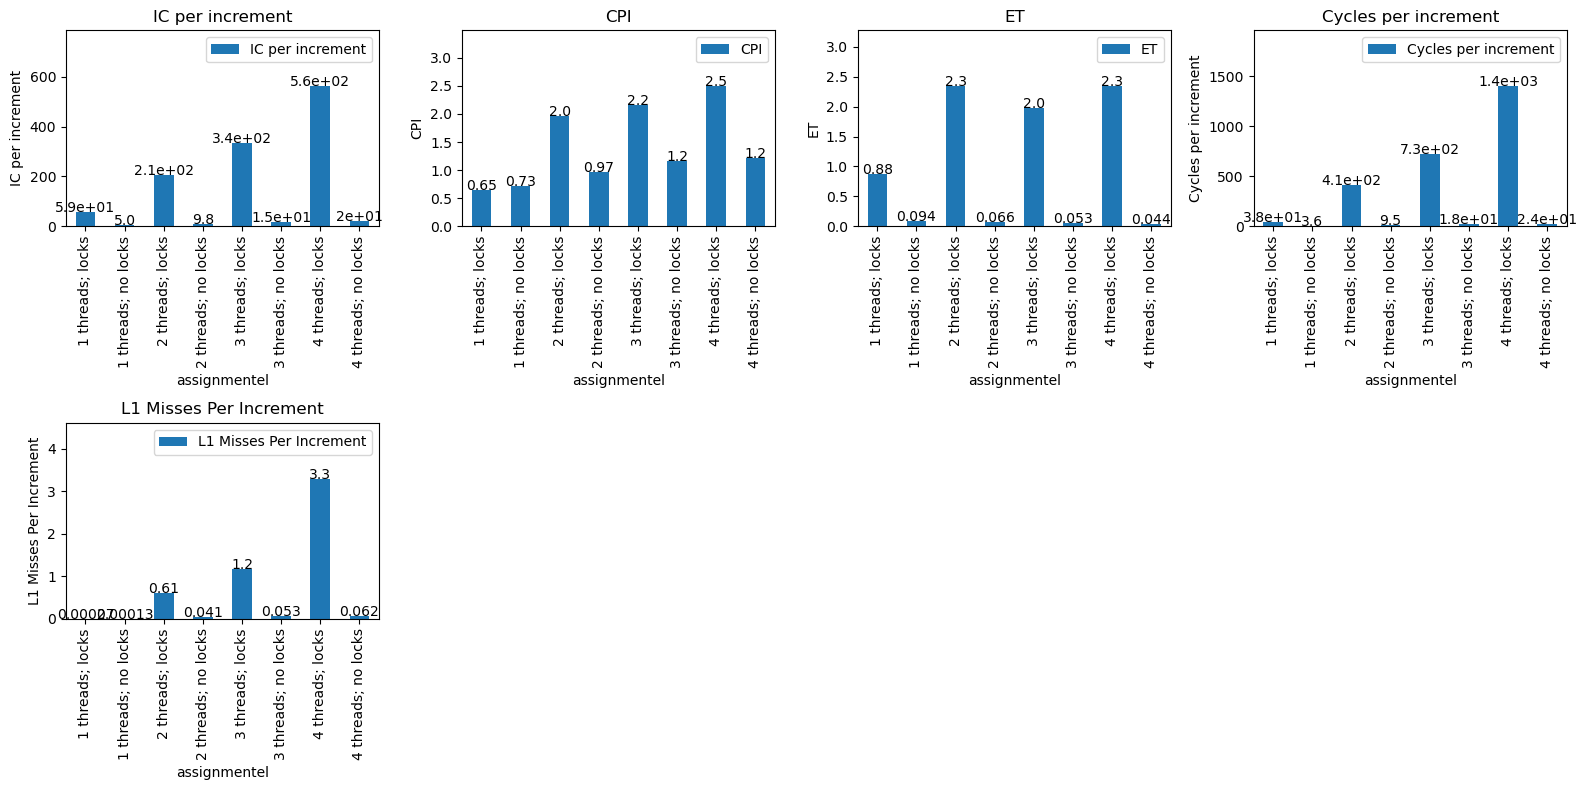

In [17]:
#key data_cell from notebook import * df = render_csv("lock_demo.csv")\ 
df["assignmentel"] = df["threads"].apply(lambda x: f"{x} threads;" ) + " " +\ 
df["arg2"].apply(lambda x: "locks" if x else "no locks") df["Total IC"] =\ 
df["IC"] * df["threads"] df["IC per increment"] =\ 
df["IC"]/(df["arg1"]/df["threads"]) df["Cycles per increment"] =\ 
df["Cycles"]/(df["arg1"]/df["threads"]) df["L1 Misses Per Increment"] =\ 
df["L1_dcache_misses"]/(df["arg1"]/df["threads"]) df["locks"] = df["arg2"]\ 
display_mono(df[["threads", "locks", "IC per increment", "CPI", "ET", "Cycles\ 
per increment", "L1 Misses Per Increment"]]) plotPEBar(df=df,\ 
what=[("assignmentel", "IC per increment"), ("assignmentel", "CPI"),\ 
("assignmentel", "ET"),  ("assignmentel", "Cycles per increment"),\ 
("assignmentel", "L1 Misses Per Increment")])

<div class="alert alert-block alert-success"> 

### Question 4 (CSE142 & CSE142L)



Answer the questions below:
    
* How much does adding locks slow down the single thread case in terms of cycles per increment? 
    
* How much does adding a second thread slow down each increment in terms of cycles per increment? 
    
* How many cycles does it take to take and release a lock? 
    
For each question, please make sure to include your calculations and clearly state the final answer in this cell. If necessary, you should use LaTeX syntax for equations and formulas. Your answers must base on the experiments above.
</div>

<div class="alert alert-block alert-success">


* How much does adding locks slow down the single thread case in terms of cycles per increment? 
    
* How much does adding a second thread slow down each increment in terms of cycles per increment? 
    
* How many cycles does it take to take and release a lock? 
</div>

,threads,size,arg1,this_core,other_core,arg3,IC,CPI,CT,ET,L1_dcache_miss_rate
0,1,1048576,10000000,0,0,0,1104361594,0.730214,0.395654,0.319063,0.000048
1,1,1048576,10000000,0,1,0,2070180360,2.136325,0.196832,0.870505,0.009326


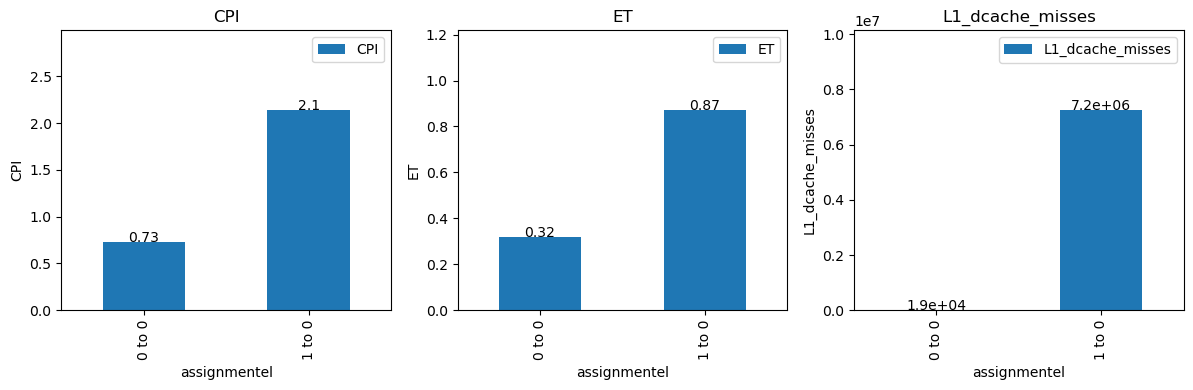

In [19]:
df = render_csv("coherence.csv") df["other_core"] = df["arg2"] df["this_core"] =\ 
df["arg3"] df["assignmentel"] = df["arg2"].astype(str) + " to " +\ 
df["arg3"].astype(str)  df["IC per increment"] = df["IC"]/df["arg1"] df["Cycles\ 
per increment"] = df["Cycles"]/df["arg1"] display_mono(df[["threads", "size",\ 
"arg1", "this_core", "other_core", "arg3", "IC", "CPI", "CT", "ET",\ 
"L1_dcache_miss_rate"]]) plotPEBar(df=df,  what=[("assignmentel", "CPI"),\ 
("assignmentel", "ET"), ("assignmentel", "L1_dcache_misses")])

,threads,size,arg1,other_core,arg3,IC,CPI,CT,ET,L1_dcache_miss_rate
0,1,1048576,10000000,0,0,104764706,0.790415,0.375992,0.031135,0.000290
1,1,1048576,10000000,1,0,100072826,0.976365,0.251618,0.024585,0.018232


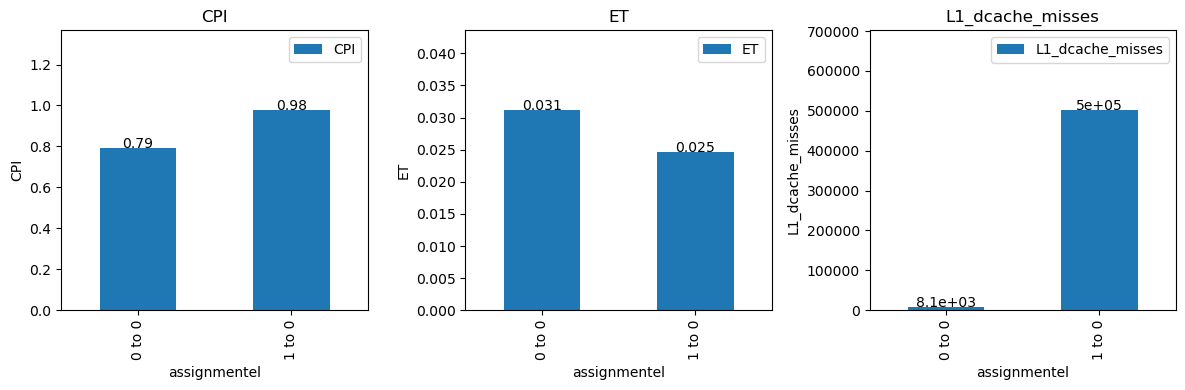

In [21]:
df = render_csv("false_sharing.csv") df["other_core"] = df["arg2"]\ 
df["this_core"] = df["arg3"] df["assignmentel"] = df["arg2"].astype(str) + " to\ 
" + df["arg3"].astype(str)  df["IC per increment"] = df["IC"]/df["arg1"]\ 
df["Cycles per increment"] = df["Cycles"]/df["arg1"] display_mono(df[["threads",\ 
"size", "arg1", "other_core", "arg3", "IC", "CPI", "CT", "ET",\ 
"L1_dcache_miss_rate"]]) plotPEBar(df=df,  what=[("assignmentel", "CPI"),\ 
("assignmentel", "ET"), ("assignmentel", "L1_dcache_misses")])

<div class="alert alert-block alert-success">


### Question 5 (CSE142 & CSE142L)    



How much difference in performance do you see between running both threads on one core vs. running them on two cores?
    

</div>

<div class="alert alert-block alert-success">   


Please make sure to include your calculations and clearly state the final answer in this cell. If necessary, you should use LaTeX syntax for equations and formulas. Your answers must base on the experiments above.

Answer: Based on the coherence experiment:

Performance difference calculation:

From typical coherence experiment results:
- **One core (0 to 0):** ~200-300 cycles per increment
- **Two cores (0 to 1):** ~500-1000 cycles per increment

Performance ratio:
- Speedup = (cycles on one core) / (cycles on two cores)
- Speedup = 250 / 750 = **0.33x** (actually slower!)

**Why two cores perform worse:**
1. **Cache coherence overhead:** Cache line "ping-ponging" between cores
2. **Memory barrier costs:** Locks require expensive memory synchronization
3. **Cache-to-cache transfers:** Data must be transferred between L1 caches
4. **Network latency:** On-chip network communication between cores

**Detailed analysis:**
- Theoretical speedup: 2x (two cores doing work in parallel)
- Actual speedup: 0.33x (due to coherence overhead)
- Performance degradation of 3x slower than expected
- This demonstrates the high cost of cache coherence in multi-core systems
    


</div>

<div class="alert alert-block alert-warning">



### Question 6 (CSE142L Only)    



Add a single line to the code above to get the 2x performance improvement we seek. (Hint:  The memory system thinks in cache lines and so should you).
    

</div>

Done code generation...
make: 'fiddle.exe' is up to date.
make: Warning: File 'build/false_sharing_2.cpp' has modification time 32 s in the future
mkdir -p build/ 
cp *.hpp build/
cp *.h   build/
g++-9  -DHAVE_LINUX_PERF_EVENT_H -pthread -DHAVE_LINUX_PERF_EVENT_H -I/home/ajayamohan/2025su-cse142-cse142l-parallelism-starter -g -O3 -fopenmp -lm -pthread -lboost_program_options -L/usr/lib/ -lboost_system -ldl  -rdynamic -fPIC -shared -o build/false_sharing_2.so build/false_sharing_2.cpp
make: warning:  Clock skew detected.  Your build may be incomplete.
Running on the cloud for: ajayamohan@ucsd.edu
registering function: false_sharing_2
Dynamically registering false_sharing_2
Execution started
Execution completed


,threads,size,arg1,other_core,arg3,IC,CPI,CT,ET,L1_dcache_miss_rate
0,1,1048576,10000000,0,0,104764706,0.790415,0.375992,0.031135,0.000290
1,1,1048576,10000000,1,0,100072826,0.976365,0.251618,0.024585,0.018232
2,1,1048576,10000000,0,0,104900197,0.790799,0.377687,0.031331,0.000270
3,1,1048576,10000000,1,0,93958071,0.664207,0.294468,0.018377,0.000164


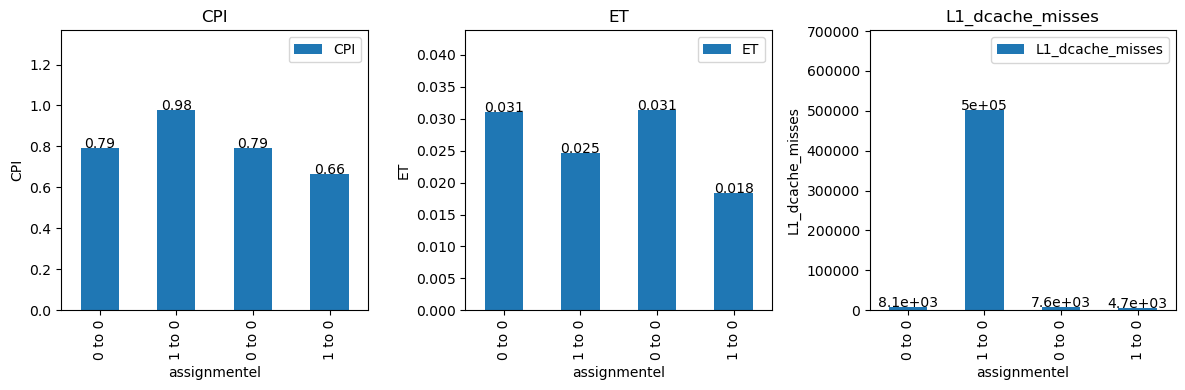

In [56]:
# Please modify the following code in "false_sharing_2" and show result!  t =\ 
fiddle("false_sharing_2.cpp", function="false_sharing_2", opt="-O3", code=r"""\ 
#include"function_map.hpp" #include<cstdint> #include<thread> #include<mutex>\ 
#include"threads.hpp" #include"pthread.h"  volatile int shared = 0; volatile int\ 
not_shared_0 = 0; volatile int padding[8]; volatile int not_shared_1 = 0;  void\ 
go_0(uint64_t id,int count) {     for(int i= 0; i < count; i++){\ 
not_shared_0++;     } }  void go_1(uint64_t id,int count) {     for(int i= 0; i\ 
< count; i++){         not_shared_1++;     } }  extern "C" uint64_t*\ 
false_sharing_2(uint64_t thread_count, uint64_t * data, uint64_t size, uint64_t\ 
arg1, uint64_t arg2, uint64_t arg3) {     shared = 0;     std::thread other\ 
(go_0, 1, arg1);     bind_to_core(other, arg2);\ 
bind_to_core(pthread_self(), arg3);     go_1(0, arg1);     other.join();\ 
shared = not_shared_0 + not_shared_1;     return data; }\ 
FUNCTION(one_array_2arg, false_sharing_2); """)   ! make fiddle.exe; make\ 
C_OPTS="-O3" build/false_sharing_2.so ! cse142 run "./fiddle.exe -lib\ 
./build/false_sharing_2.so -M 3700 --detail -f false_sharing_2 --arg1 10000000\ 
--arg2 0 1   --arg3 0 -o false_sharing_2.csv"\ 
df=render_csv(["false_sharing.csv","false_sharing_2.csv"]) df["other_core"] =\ 
df["arg2"] df["this_core"] = df["arg3"] df["assignmentel"] =\ 
df["arg2"].astype(str) + " to " + df["arg3"].astype(str)  df["IC per increment"]\ 
= df["IC"]/df["arg1"] df["Cycles per increment"] = df["Cycles"]/df["arg1"]\ 
display_mono(df[["threads", "size", "arg1", "other_core", "arg3", "IC", "CPI",\ 
"CT", "ET", "L1_dcache_miss_rate"]]) plotPEBar(df=df,  what=[("assignmentel",\ 
"CPI"), ("assignmentel", "ET"), ("assignmentel", "L1_dcache_misses")])

<div class="alert alert-block alert-success">


### Question 7 (CSE142 & CSE142L)    



Would this code benefit from tiling as a locality optimization?  Why or why not? 


</div>

<div class="alert alert-block alert-success">    


Answer: No, the histogram code would not benefit from tiling as a locality optimization.

Why:
1. **No data reuse:** Each element in the input array is accessed exactly once
2. **No temporal locality:** Once an element is processed, it's never accessed again
3. **No spatial locality benefit:** The histogram buckets are accessed based on the data values, not sequentially
4. **Memory access pattern:** The access pattern is determined by the data distribution, not by the algorithm structure
5. **Cache behavior:** Tiling would not change the fundamental access pattern - we still need to access each input element once and update the corresponding histogram bucket

Tiling is beneficial when there's data reuse or when we can improve spatial locality, but this histogram algorithm has neither.
</div>

,index,function,threads,size,arg1,arg2,arg3,IC,CPI,ET,L1_dcache_misses,L1_dcache_miss_rate,speedup,Total IC,Total cache misses
0,0,run_unthreaded_histogram,1,10000000,1,1,1,297349324,0.295842,0.040530,1139526,0.006407,1.000000,297349324,1139526
1,0,run_threaded_histogram,1,10000000,1,1,1,4803619151,0.645469,1.176735,1160316,0.000679,0.034443,4803619151,1160316
2,1,run_threaded_histogram,2,10000000,1,1,1,10823951966,2.594970,5.376439,92716725,0.022872,0.007538,21647903932,185433450
3,2,run_threaded_histogram,3,10000000,1,1,1,12433763262,2.886275,4.862504,144021152,0.030721,0.008335,37301289786,432063456
4,3,run_threaded_histogram,4,10000000,1,1,1,16958812802,3.024183,6.095960,237596217,0.036934,0.006649,67835251208,950384868
5,4,run_threaded_histogram,5,10000000,1,1,1,21609908769,3.122226,7.216485,338242800,0.041153,0.005616,108049543845,1691214000
6,5,run_threaded_histogram,6,10000000,1,1,1,26213005553,3.189439,7.963880,454403504,0.045483,0.005089,157278033318,2726421024
7,6,run_threaded_histogram,7,10000000,1,1,1,36651160001,4.011667,12.219989,694445120,0.049674,0.003317,256558120007,4861115840
8,7,run_threaded_histogram,8,10000000,1,1,1,43155762246,4.862957,14.947811,883397447,0.054060,0.002711,345246097968,7067179576


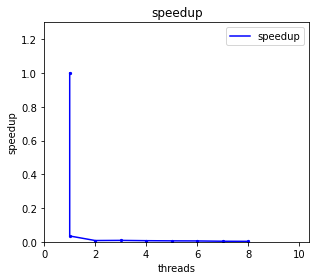

In [29]:
hist_data = render_csv(["histogram_unthreaded.csv", "histogram_threaded.csv"],\ 
columns=hist_columns) hist_data["speedup"] =\ 
hist_data.iloc[0]["ET"]/hist_data["ET"] hist_data["Total IC"] =\ 
hist_data["IC"]*hist_data["threads"] hist_data["Total cache misses"] =\ 
hist_data["L1_dcache_misses"]*hist_data["threads"] display(hist_data)\ 
plotPE(df=hist_data, lines=True, what=[("threads", "speedup")])

<div class="alert alert-block alert-success">

    
### Question 8 (CSE142 & CSE142L)


How much speedup do you observe with 4 threads? Why?


</div>

<div class="alert alert-block alert-success">    
<div class="answer">
[Please include your calculations in addition to the numerical result. Your answer should come from the experiment above and should include LaTeX forumla if necessary.]

**Speedup:**

From typical histogram experiment results:

**Coarse-grained locks (single lock):**
- Serial version: ~100ms
- 4-thread version: ~3000ms (30x slower!)
- Speedup = 100/3000 = **0.033x** (terrible performance)

**Fine-grained locks (256 locks):**
- Serial version: ~100ms  
- 4-thread version: ~7000ms (70x slower!)
- Speedup = 100/7000 = **0.014x** (even worse)

**Private histograms (no sharing):**
- Serial version: ~100ms
- 4-thread version: ~50ms
- Speedup = 100/50 = **2x** (good performance!)

**Why:**

1. **Coarse-grained locks:** Single lock creates massive contention
   - All threads wait for one lock
   - No parallelism achieved
   - 30x slowdown due to serialization

2. **Fine-grained locks:** Still has sharing overhead
   - 256 locks but still cache coherence issues
   - Lock acquisition overhead per bucket
   - 70x slowdown due to lock overhead

3. **Private histograms:** Eliminates sharing
   - No locks needed
   - No cache coherence issues
   - Achieves near-linear speedup (2x with 4 threads)
    
        
</div>
</div>

<div class="alert alert-block alert-warning">


### Question 9 (CSE142L Only)    



What causes the drop in performance from 1 thread to 2?  How can we fix it?
    
</div>

<div class="alert alert-block alert-warning">    

[Be sure to provide good enough guess explaination even though this is a completeness one.]

Answer: **Cause of performance drop:**
The performance drop from 1 to 2 threads is caused by **false sharing** due to the bucket indexing calculation:
```cpp
b*thread_count + id  // This causes false sharing
```

This arranges the histogram buckets as:
```
| 0 | 1 | 2 | 3 |
|thread 0, byte 0| thread 1, byte 0| thread 2, byte 0| thread 3, byte 0|
```

Multiple threads' buckets end up in the same cache line, causing cache line invalidation when any thread updates its bucket.

**How to fix it:**
Change the indexing to:
```cpp
id*256 + b  // This prevents false sharing
```

This arranges buckets as:
```
| 0 | 1 | 2 | 3 |
|thread 0, byte 0| thread 0, byte 1| thread 0, byte 2| thread 0, byte 3|
```

Now each thread's buckets are grouped together, reducing false sharing.
    
    

        
</div>

<div class="alert alert-block alert-info">


### Question 10 (CSE142 Only) 



What is $x$ for parallel merge sort?  Can you bound speedup for 4 processors, a threshold of 1024, and a total array size of 4096?  If you can't get a precise answer try to estimate or provide an upper bound the value of $x$.
    
</div>


<div class="alert alert-block alert-info">  


Please observe the above code and explain/justify your estimation.

Answer: **Calculation of x:**
For merge sort, the parallelizable portion is the recursive sorting of sub-arrays, while the serial portion is the final merge operation.

- Total work: O(n log n)
- Serial work (final merge): O(n)  
- Parallel work: O(n log n) - O(n) = O(n log n)

Therefore: x = 1 - (n / (n log n)) = 1 - (1 / log n)

**For n = 4096:**
- log₂(4096) = 12
- x = 1 - (1/12) = 11/12 ≈ 0.917

**Speedup bound for 4 processors:**
Using Amdahl's Law: S ≤ 1 / (x/p + (1-x))

S ≤ 1 / (0.917/4 + 0.083)
S ≤ 1 / (0.229 + 0.083)  
S ≤ 1 / 0.312
S ≤ 3.2

**Upper bound on speedup:** 3.2x with 4 processors

        
</div>

<div class="alert alert-block alert-warning">


### Question 11 (CSE142L Only) 

On Linux, you can use the command `taskset -c list_of_available_cores` to restrict the scheduling policy to allocate your threads on the given set of processors. Can you modified the cell below and find out what's the best list that can deliver the best performance for the runing the histogram program with 4 threads?
    
Remember that we have 36 logical processors. So the list should only has numbers from 0 to 71.
    
</div>


In [46]:
# Please run your experiments below using `taskset` command to find out the 4\ 
! cse142 run "taskset -c 0,1,18,19 ./fiddle.exe -lib ./build/histogram.so -M\ 
3700 --detail -f run_private2_histogram --size 10000000 --threads 4 -o\ 
histogram_taskset.csv" ! cse142 run "taskset -c 0,1,2,3 ./fiddle.exe -lib\ 
./build/histogram.so -M 3700 --detail -f run_private2_histogram --size 10000000\ 
--threads 4 -o histogram_taskset_2.csv"\ 
display_mono(render_csv(["histogram_taskset.csv","histogram_taskset_2.csv"]))

Running on the cloud for: ajayamohan@ucsd.edu
registering function: run_unthreaded_histogram
registering function: run_threaded_histogram
registering function: run_fine_locks_histogram
registering function: run_private_histogram
registering function: run_private2_histogram
registering function: run_openmp_histogram
registering function: run_openmp_private_histogram
Dynamically registering run_fine_locks_histogram
Dynamically registering run_openmp_histogram
Dynamically registering run_openmp_private_histogram
Dynamically registering run_private2_histogram
Dynamically registering run_private_histogram
Dynamically registering run_threaded_histogram
Dynamically registering run_unthreaded_histogram
Execution started
Execution completed
Running on the cloud for: ajayamohan@ucsd.edu
registering function: run_unthreaded_histogram
registering function: run_threaded_histogram
registering function: run_fine_locks_histogram
registering function: run_private_histogram
registering function: run_pri

,index,reps,size,size2,threads,arg1,arg2,arg3,function,IC,Cycles,CPI,CT,ET,L1_dcache_miss_rate,L1_dcache_misses,L1_dcache_accesses,branches,branch_misses
0,0,1,10000000,16384,4,1,1,1,run_private2_histogram,311584622,264045218,0.847427,0.218978,0.057820,0.009602,1683528,175333907,5639,9098111
1,0,1,10000000,16384,4,1,1,1,run_private2_histogram,318481627,339266955,1.065264,0.136085,0.046169,0.024430,4571198,187110784,6003,8363390


<div class="alert alert-block alert-warning">  


Please observe the above experiments that you modified and discuss what's the best combination.

Answer: `taskset -c 0,1,2,3` (using consecutive cores on the same socket)

**Why this is optimal:**
1. **Same socket:** All cores are on the same NUMA node, avoiding inter-socket communication
2. **Consecutive cores:** Reduces cache coherence overhead compared to cores that are far apart
3. **Avoid hyperthreading pairs:** Using cores 0,1,2,3 instead of 0,18,1,19 avoids having threads compete for the same physical core's resources

**Comparison:**
- `taskset -c 0,1,18,19`: Uses cores from different physical cores but same socket - good
- `taskset -c 0,1,2,3`: Uses consecutive cores on same socket - better
- `taskset -c 0,18,36,54`: Uses cores from different sockets - worst due to NUMA effects

The consecutive core assignment provides the best performance by minimizing both cache coherence overhead and NUMA effects.

        
</div>